In [ ]:
# Installing required packages
#install.packages("")

In [3]:
# Load paths
setwd('..')
load_dot_env()
trends_path <- Sys.getenv("GOOGLE_TRENDS")
crypto_path <- Sys.getenv("CRYPTO")
data_path <- Sys.getenv("DATA_PATH")
my_root <- Sys.getenv("MY_ROOT")

Warning message in readLines(file):
"incomplete final line found on '.env'"

# Loading data base

In [4]:
setwd(data_path)

# The database contains returns of btc price and google trends info.
db <- read.table("data_base.csv", sep=",", header = TRUE)

# Setting up

>**A logistic model will be built**


- Two qualitatives variables ared added
- The answer-y variable needs to be defined
- Null model
- Full model
- Variables selection

In [5]:
# Two more variables will be created for identenfying the day hour and week day.
db$date <- as.POSIXct(db$date, format = "%Y-%m-%d %H:%M:%OS")

db$day <- as.factor(weekdays(db$date))
db$hour <- as.factor(as.numeric(strftime(db$date, format="%H")))

In [6]:
r_a <- -0.515865739661981
r_b <- 0.515830425509656



divide_y <- function(x){
    if(x < r_a){
        return(0)
    } else{
        return(1)
    }
}

db$y <- sapply(db$returns, divide_y)

>**At 0_explore_btc_prices.ipynb file we adjusted a curved to returns data, this was made for spliting the data in relatively equals parts. In this case the data was splited in 33.33%, 33.33% and 33.33% for the dicotomic y-variable**

>**We must say, the spliting is just an arbitray selection, it could've been for example 5%, 90% and 5%**

In [7]:
# Spliting the data into training and testing parts:
percent <- 0.8

db_training_t <- db[1:round(dim(db)[1]*percent, 0), ]
db_testing_t <- db[(round(dim(db)[1]*percent, 0)+1):dim(db)[1], ]

db_training <- subset(db_training_t, select=-c(date, returns, day, hour))
db_testing <- subset(db_testing_t, select=-c(date, returns, day, hour))

# Variable selection

In [8]:
mod_null <- glm(y ~ 1, data = db_training, family = "binomial")
mod_full <- glm(y ~ ., data = db_training, family = "binomial")

In [9]:
# The method Backward will be used for the selection of variables
mod_back <- stepAIC(mod_full, trace=TRUE, direction="backward")

Start:  AIC=16691.59
y ~ altcoins.season + banking.system + bce + bill.gates + bitcoin.alert + 
    bitcoin.bubble + bitcoin.dump + bitcoin.hack + bitcoin.pump + 
    bitcoin.whales + bitcoin + blockchain + coindesk + coingecko + 
    coinmarketcap + cointelegraph + crypto.assets + cryptonews + 
    debt.jubilee + debt + derivatives.market + dollar + economic.collapse + 
    economic.stimulus + economy.recovery + elon.musk + financial.bubble + 
    financial.independence + housing.market + jamie.dimon + jerome.powell + 
    microsoft + money.printing + ray.dalio + real.economy + real.estate + 
    repo.market + satoshi.nakamoto + stimulus.bill + stocks.bubble + 
    stocks.crash + vitalik.buterin + volatility + warren.buffett + 
    wonder.woman + amazon + apple + bitcoin.twitter + ethereum + 
    smart.contracts + twitter + litecoin + ripple + netflix + 
    sec + investing + bloomberg + china.economy + facebook + 
    fed + financial.crisis

                         Df Deviance   AIC

                         Df Deviance   AIC
- financial.crisis        1    16568 16686
- stocks.bubble           1    16568 16686
- money.printing          1    16568 16686
- china.economy           1    16568 16686
- coinmarketcap           1    16568 16686
- repo.market             1    16568 16686
- litecoin                1    16568 16686
- warren.buffett          1    16568 16686
- wonder.woman            1    16568 16686
- stocks.crash            1    16568 16686
- jamie.dimon             1    16568 16686
- cointelegraph           1    16568 16686
- economic.collapse       1    16568 16686
- financial.bubble        1    16568 16686
- altcoins.season         1    16568 16686
- coindesk                1    16569 16687
- stimulus.bill           1    16569 16687
- investing               1    16569 16687
- twitter                 1    16569 16687
- crypto.assets           1    16569 16687
- dollar                  1    16569 16687
- derivatives.market      1    16569 16687
- apple    


Step:  AIC=16681.63
y ~ altcoins.season + banking.system + bce + bill.gates + bitcoin.alert + 
    bitcoin.bubble + bitcoin.dump + bitcoin.hack + bitcoin.pump + 
    bitcoin.whales + bitcoin + blockchain + coindesk + coingecko + 
    coinmarketcap + cointelegraph + crypto.assets + cryptonews + 
    debt.jubilee + debt + derivatives.market + dollar + economic.collapse + 
    economic.stimulus + financial.bubble + financial.independence + 
    housing.market + jamie.dimon + jerome.powell + microsoft + 
    ray.dalio + real.economy + real.estate + repo.market + satoshi.nakamoto + 
    stimulus.bill + stocks.crash + vitalik.buterin + volatility + 
    warren.buffett + wonder.woman + amazon + apple + bitcoin.twitter + 
    ethereum + smart.contracts + twitter + litecoin + ripple + 
    netflix + sec + investing + bloomberg + china.economy + facebook + 
    fed

                         Df Deviance   AIC
- china.economy           1    16568 16680
- coinmarketcap           1    16568 16680
-


Step:  AIC=16675.83
y ~ altcoins.season + banking.system + bce + bill.gates + bitcoin.alert + 
    bitcoin.bubble + bitcoin.dump + bitcoin.hack + bitcoin.pump + 
    bitcoin.whales + bitcoin + blockchain + coindesk + coingecko + 
    cointelegraph + crypto.assets + cryptonews + debt.jubilee + 
    debt + derivatives.market + dollar + economic.collapse + 
    economic.stimulus + financial.bubble + financial.independence + 
    housing.market + jamie.dimon + jerome.powell + microsoft + 
    ray.dalio + real.economy + real.estate + satoshi.nakamoto + 
    stimulus.bill + stocks.crash + vitalik.buterin + volatility + 
    warren.buffett + wonder.woman + amazon + apple + bitcoin.twitter + 
    ethereum + smart.contracts + twitter + litecoin + ripple + 
    netflix + sec + investing + bloomberg + facebook + fed

                         Df Deviance   AIC
- litecoin                1    16568 16674
- warren.buffett          1    16568 16674
- wonder.woman            1    16568 16674
- stocks.


Step:  AIC=16670.25
y ~ altcoins.season + banking.system + bce + bill.gates + bitcoin.alert + 
    bitcoin.bubble + bitcoin.dump + bitcoin.hack + bitcoin.pump + 
    bitcoin.whales + bitcoin + blockchain + coindesk + coingecko + 
    cointelegraph + crypto.assets + cryptonews + debt.jubilee + 
    debt + derivatives.market + dollar + economic.collapse + 
    economic.stimulus + financial.bubble + financial.independence + 
    housing.market + jamie.dimon + jerome.powell + microsoft + 
    ray.dalio + real.economy + real.estate + satoshi.nakamoto + 
    stimulus.bill + stocks.crash + vitalik.buterin + volatility + 
    amazon + apple + bitcoin.twitter + ethereum + smart.contracts + 
    twitter + ripple + netflix + sec + investing + bloomberg + 
    facebook + fed

                         Df Deviance   AIC
- jamie.dimon             1    16568 16668
- stocks.crash            1    16569 16669
- cointelegraph           1    16569 16669
- economic.collapse       1    16569 16669
- financi


Step:  AIC=16664.97
y ~ altcoins.season + banking.system + bce + bill.gates + bitcoin.alert + 
    bitcoin.bubble + bitcoin.dump + bitcoin.hack + bitcoin.pump + 
    bitcoin.whales + bitcoin + blockchain + coindesk + coingecko + 
    crypto.assets + cryptonews + debt.jubilee + debt + derivatives.market + 
    dollar + economic.collapse + economic.stimulus + financial.bubble + 
    financial.independence + housing.market + jerome.powell + 
    microsoft + ray.dalio + real.economy + real.estate + satoshi.nakamoto + 
    stimulus.bill + vitalik.buterin + volatility + amazon + apple + 
    bitcoin.twitter + ethereum + smart.contracts + twitter + 
    ripple + netflix + sec + investing + bloomberg + facebook + 
    fed

                         Df Deviance   AIC
- economic.collapse       1    16570 16664
- financial.bubble        1    16570 16664
- altcoins.season         1    16570 16664
- investing               1    16570 16664
- stimulus.bill           1    16570 16664
- twitter       


Step:  AIC=16660.76
y ~ banking.system + bce + bill.gates + bitcoin.alert + bitcoin.bubble + 
    bitcoin.dump + bitcoin.hack + bitcoin.pump + bitcoin.whales + 
    bitcoin + blockchain + coindesk + coingecko + crypto.assets + 
    cryptonews + debt.jubilee + debt + derivatives.market + dollar + 
    economic.stimulus + financial.independence + housing.market + 
    jerome.powell + microsoft + ray.dalio + real.economy + real.estate + 
    satoshi.nakamoto + stimulus.bill + vitalik.buterin + volatility + 
    amazon + apple + bitcoin.twitter + ethereum + smart.contracts + 
    twitter + ripple + netflix + sec + investing + bloomberg + 
    facebook + fed

                         Df Deviance   AIC
- investing               1    16572 16660
- stimulus.bill           1    16572 16660
- crypto.assets           1    16572 16660
- dollar                  1    16572 16660
- twitter                 1    16572 16660
- coindesk                1    16572 16660
- bitcoin.pump            1    1657

                         Df Deviance   AIC
- twitter                 1    16575 16657
- coindesk                1    16575 16657
- crypto.assets           1    16575 16657
- bloomberg               1    16576 16658
- economic.stimulus       1    16576 16658
- netflix                 1    16576 16658
- bitcoin.pump            1    16576 16658
- ripple                  1    16576 16658
<none>                         16574 16658
- derivatives.market      1    16576 16658
- debt                    1    16577 16659
- real.estate             1    16577 16659
- satoshi.nakamoto        1    16577 16659
- apple                   1    16577 16659
- bill.gates              1    16578 16660
- financial.independence  1    16578 16660
- smart.contracts         1    16578 16660
- jerome.powell           1    16578 16660
- housing.market          1    16580 16662
- facebook                1    16580 16662
- sec                     1    16583 16665
- bce                     1    16583 16665
- volatilit


Step:  AIC=16655.31
y ~ banking.system + bce + bill.gates + bitcoin.alert + bitcoin.bubble + 
    bitcoin.dump + bitcoin.hack + bitcoin.pump + bitcoin.whales + 
    bitcoin + blockchain + coingecko + cryptonews + debt.jubilee + 
    debt + derivatives.market + economic.stimulus + financial.independence + 
    housing.market + jerome.powell + microsoft + ray.dalio + 
    real.economy + real.estate + satoshi.nakamoto + vitalik.buterin + 
    volatility + amazon + apple + bitcoin.twitter + ethereum + 
    smart.contracts + netflix + sec + bloomberg + facebook + 
    fed

                         Df Deviance   AIC
- bloomberg               1    16581 16655
- netflix                 1    16581 16655
- economic.stimulus       1    16581 16655
<none>                         16579 16655
- bitcoin.pump            1    16581 16655
- debt                    1    16582 16656
- derivatives.market      1    16582 16656
- bill.gates              1    16582 16656
- real.estate             1    16582 


Step:  AIC=16654.72
y ~ banking.system + bce + bill.gates + bitcoin.alert + bitcoin.bubble + 
    bitcoin.dump + bitcoin.hack + bitcoin.pump + bitcoin.whales + 
    bitcoin + blockchain + coingecko + cryptonews + debt.jubilee + 
    debt + financial.independence + housing.market + jerome.powell + 
    microsoft + ray.dalio + real.economy + real.estate + satoshi.nakamoto + 
    vitalik.buterin + volatility + amazon + apple + bitcoin.twitter + 
    ethereum + smart.contracts + sec + facebook + fed

                         Df Deviance   AIC
- debt                    1    16589 16655
<none>                         16587 16655
- bitcoin.pump            1    16589 16655
- bill.gates              1    16590 16656
- apple                   1    16590 16656
- satoshi.nakamoto        1    16590 16656
- financial.independence  1    16591 16657
- jerome.powell           1    16591 16657
- housing.market          1    16591 16657
- smart.contracts         1    16591 16657
- facebook              

>**The best model using backward method is:**

In [10]:
summary(mod_back)


Call:
glm(formula = y ~ banking.system + bce + bill.gates + bitcoin.alert + 
    bitcoin.bubble + bitcoin.dump + bitcoin.hack + bitcoin.whales + 
    bitcoin + blockchain + coingecko + cryptonews + debt.jubilee + 
    financial.independence + housing.market + jerome.powell + 
    microsoft + ray.dalio + real.economy + real.estate + satoshi.nakamoto + 
    vitalik.buterin + volatility + amazon + apple + bitcoin.twitter + 
    ethereum + smart.contracts + sec + facebook + fed, family = "binomial", 
    data = db_training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6630   0.3998   0.5134   0.6290   1.5912  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)             2.2604713  0.2455442   9.206  < 2e-16 ***
banking.system          0.0069627  0.0016713   4.166 3.10e-05 ***
bce                     0.0047299  0.0014395   3.286 0.001017 ** 
bill.gates              0.0019633  0.0010967   1.790 0.073413 .  
bitcoin.alert 

In [11]:
# Variables weren't used
mod_back$anova

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
,NA,NA,19673,16567.59,16691.59
- economy.recovery,1,0.0001417224,19674,16567.59,16689.59
- elon.musk,1,0.0002047545,19675,16567.60,16687.60
- financial.crisis,1,0.0010184209,19676,16567.60,16685.60
- stocks.bubble,1,0.0141269361,19677,16567.61,16683.61
- money.printing,1,0.0196725419,19678,16567.63,16681.63
- china.economy,1,0.0382779995,19679,16567.67,16679.67
- coinmarketcap,1,0.0744741474,19680,16567.74,16677.74
- repo.market,1,0.0876703428,19681,16567.83,16675.83
- litecoin,1,0.0964832724,19682,16567.93,16673.93


# Multicolinearity

In [12]:
# Checking Variance Inflation Factor (VIF)
vif_back <- vif(mod_back)
vif_back

banking.system                    bce             bill.gates 
              2.389211               2.285063               1.322708 
         bitcoin.alert         bitcoin.bubble           bitcoin.dump 
              1.120910               1.375831               1.181584 
          bitcoin.hack         bitcoin.whales                bitcoin 
              1.160150               1.058598               2.271884 
            blockchain              coingecko             cryptonews 
              3.026796               1.745070               1.287343 
          debt.jubilee financial.independence         housing.market 
              1.100706               2.038918               3.761043 
         jerome.powell              microsoft              ray.dalio 
              1.249511               3.485638               1.354432 
          real.economy            real.estate       satoshi.nakamoto 
              2.214650               5.459604               1.223744 
       vitalik.buterin             volatility                 amazon 
              1.247095               2.986440               1.857479 
                 apple        bitcoin.twitter               ethereum 
              1.966357               2.161656               1.747675 
       smart.contracts                    sec               facebook 
              1.828166               1.287511               1.866465 
                   fed 
              1.936113

In [13]:
# Variable with a multicolineality problem, assuming VIF > 1.5 
vif_back <- as.data.frame(vif_back)
vars_corr <- vif_back %>% filter(vif_back > 1.5) %>% row.names()
sort(vars_corr)

[1] "amazon"                 "apple"                  "banking.system"        
 [4] "bce"                    "bitcoin"                "bitcoin.twitter"       
 [7] "blockchain"             "coingecko"              "ethereum"              
[10] "facebook"               "fed"                    "financial.independence"
[13] "housing.market"         "microsoft"              "real.economy"          
[16] "real.estate"            "smart.contracts"        "volatility"

>**Let's check the correlation among all variables with "big" VIF's**

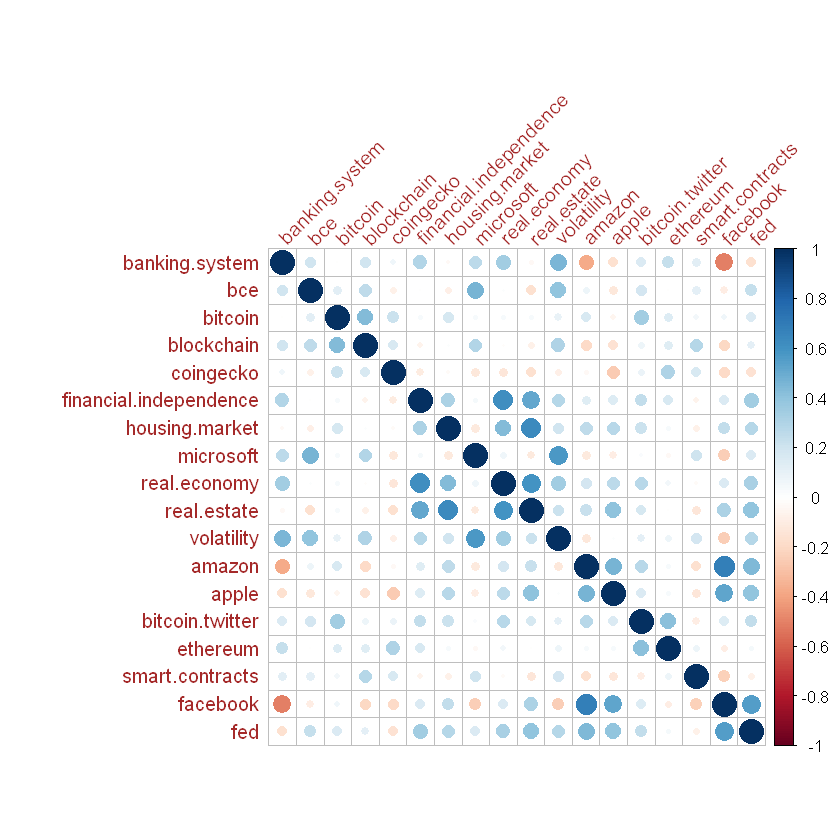

In [14]:
db_vif <- subset(db_testing, select=c(vars_corr))
db_corr <- cor(db_vif)
corrplot(db_corr, tl.col="brown", tl.srt=45, sig=0.5)

In [20]:
corr_simple <- function(data=df,sig=0.5){
  #convert data to numeric in order to run correlations
  #convert to factor first to keep the integrity of the data - each value will become a number rather than turn into NA
  df_cor <- data %>% mutate_if(is.character, as.factor)
  df_cor <- df_cor %>% mutate_if(is.factor, as.numeric)  #run a correlation and drop the insignificant ones
  corr <- cor(df_cor)
  #prepare to drop duplicates and correlations of 1     
  corr[lower.tri(corr,diag=TRUE)] <- NA 
  #drop perfect correlations
  corr[corr == 1] <- NA   #turn into a 3-column table
  corr <- as.data.frame(as.table(corr))
  #remove the NA values from above 
  corr <- na.omit(corr)   #select significant values  
  corr <- subset(corr, abs(Freq) > sig) 
  #sort by highest correlation
  corr <- corr[order(-abs(corr$Freq)),]   #print table
  #print(corr)  #turn corr back into matrix in order to plot with corrplot
  #mtx_corr <- reshape2::acast(corr, Var1~Var2, value.var="Freq")
  
  #plot correlations visually
  #corrplot(mtx_corr, is.corr=FALSE, tl.col="black", na.label=" ")

  return(corr)
}

df_correlations <- corr_simple(db_vif, 0.55)
df_correlations$Var1 <- as.character(df_correlations$Var1)
df_correlations$Var2 <- as.character(df_correlations$Var2)
df_correlations

,Var1,Var2,Freq
300,amazon,facebook,0.6888570
169,housing.market,real.estate,0.6370244
150,financial.independence,real.economy,0.6179947
171,real.economy,real.estate,0.5979702
188,microsoft,volatility,0.5795577
323,facebook,fed,0.5562698


>**For simplicity the interaction between variables will be taken whose correlation value is: |ro| > 0.5**

# Model selection

## Binomial regression

In [18]:
# Full model
mod_full <- glm(y ~ ., data = db_training, family = "binomial")

In [19]:
# Backward method model
mod_back <- glm(y ~ banking.system + bce + bill.gates + bitcoin.alert + 
                    bitcoin.bubble + bitcoin.dump + bitcoin.hack + bitcoin.whales + 
                    bitcoin + blockchain + coingecko + cryptonews + debt.jubilee + 
                    financial.independence + housing.market + jerome.powell + 
                    microsoft + ray.dalio + real.economy + real.estate + satoshi.nakamoto + 
                    vitalik.buterin + volatility + amazon + apple + bitcoin.twitter + 
                    ethereum + smart.contracts + sec + facebook + fed,
                data = db_training, family = "binomial")

In [21]:
# Backward method model without variables with high VIF
mod_back_vif <- glm(y ~ banking.system + bce + bill.gates + bitcoin.alert + 
                        bitcoin.bubble + bitcoin.dump + bitcoin.hack + bitcoin.whales + 
                        bitcoin + blockchain + coingecko + cryptonews + debt.jubilee + 
                        jerome.powell + ray.dalio + satoshi.nakamoto + 
                        vitalik.buterin + apple + bitcoin.twitter + 
                        ethereum + smart.contracts + sec,
                    data = db_training, family = "binomial")

In [25]:
# Backward method model with the interaction of variables with high VIF
mod_back_vif_interaction <- glm(formula = y ~ banking.system + bce + bill.gates + bitcoin.alert + 
                                            bitcoin.bubble + bitcoin.dump + bitcoin.hack + bitcoin.whales + 
                                            bitcoin + blockchain + coingecko + cryptonews + debt.jubilee + 
                                            financial.independence + housing.market + jerome.powell + 
                                            microsoft + ray.dalio + real.economy + real.estate + satoshi.nakamoto + 
                                            vitalik.buterin + volatility + amazon + apple + bitcoin.twitter + 
                                            ethereum + smart.contracts + sec + facebook + fed +
                                            amazon*facebook +
                                            housing.market*real.estate + 
                                            financial.independence*real.economy +
                                            real.economy*real.estate +
                                            microsoft*volatility +
                                            facebook*fed, 
                                family = "binomial", data = db_training)

## Binomial Generalized Linear Mixed Models

# Model prediction

## Binomial regression

Setting levels: control = 0, case = 1
Setting direction: controls < cases


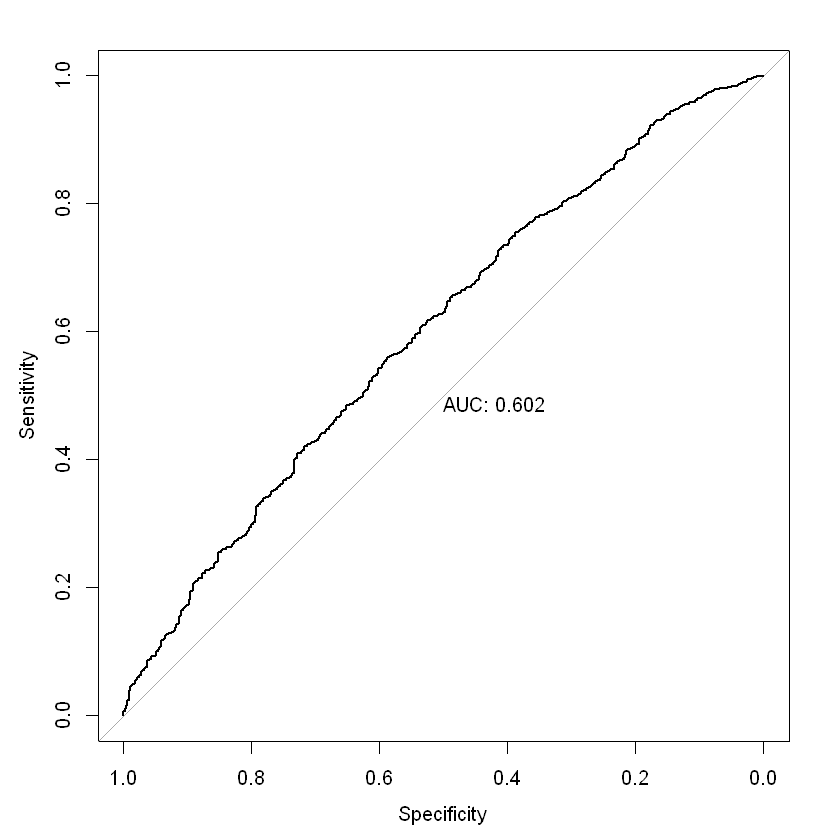

In [29]:
test_mod_full <- predict(mod_full, db_testing, type="response")
auc_mod_full = roc(db_testing$y ~ test_mod_full, plot = TRUE, print.auc = TRUE)

Setting levels: control = 0, case = 1
Setting direction: controls < cases


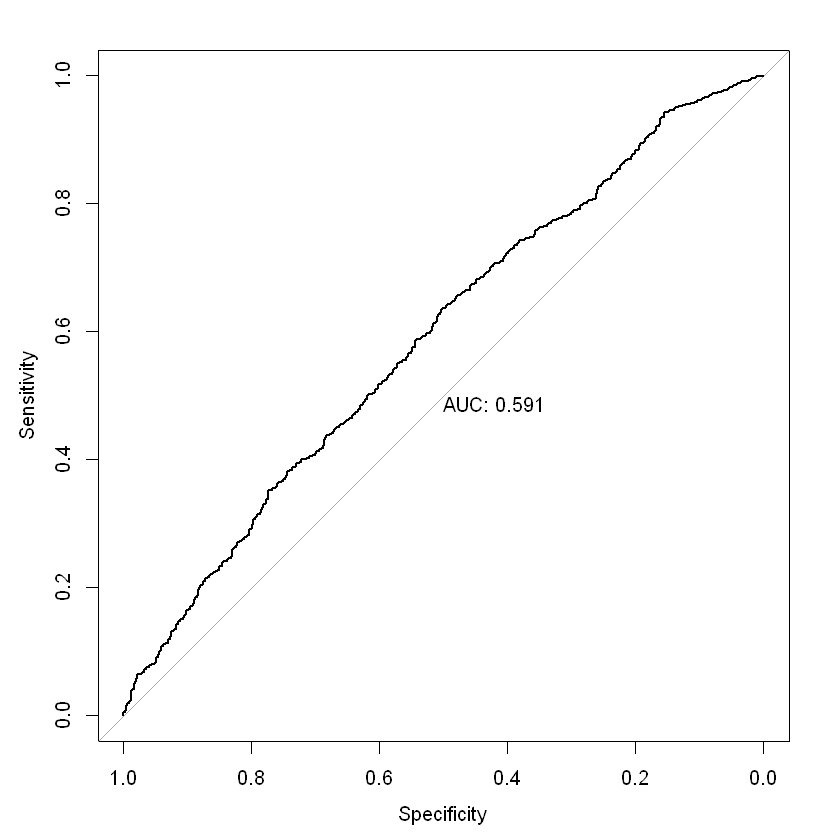

In [30]:
test_mod_back <- predict(mod_back, db_testing, type="response")
auc_mod_back = roc(db_testing$y ~ test_mod_back, plot = TRUE, print.auc = TRUE)

Setting levels: control = 0, case = 1
Setting direction: controls < cases


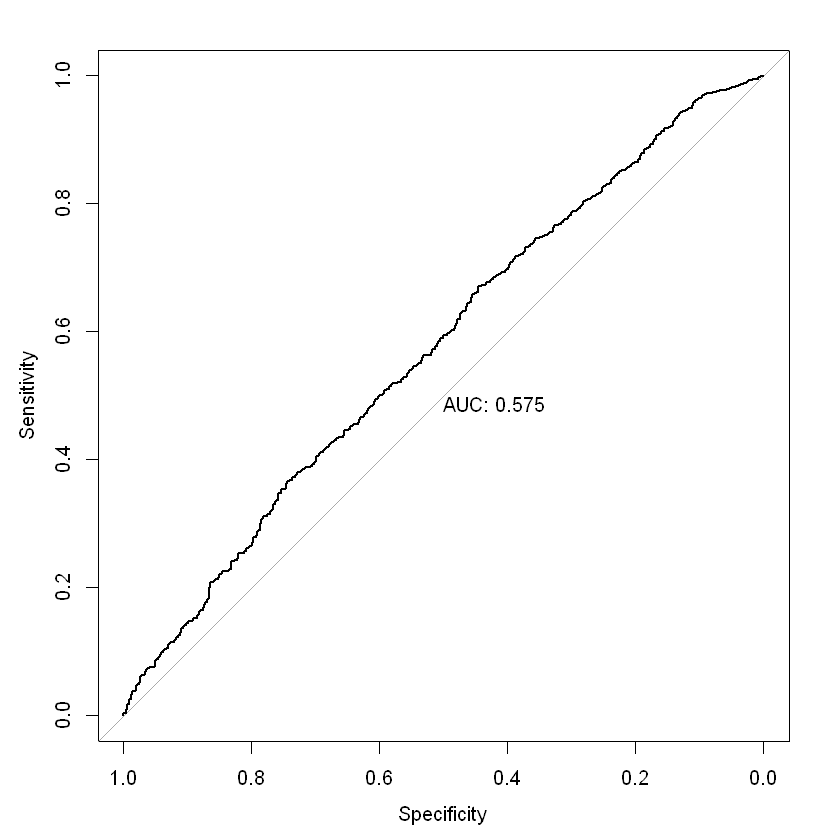

In [31]:
test_mod_back_vif <- predict(mod_back_vif, db_testing, type="response")
auc_mod_back_vif = roc(db_testing$y ~ test_mod_back_vif, plot = TRUE, print.auc = TRUE)

Setting levels: control = 0, case = 1
Setting direction: controls < cases


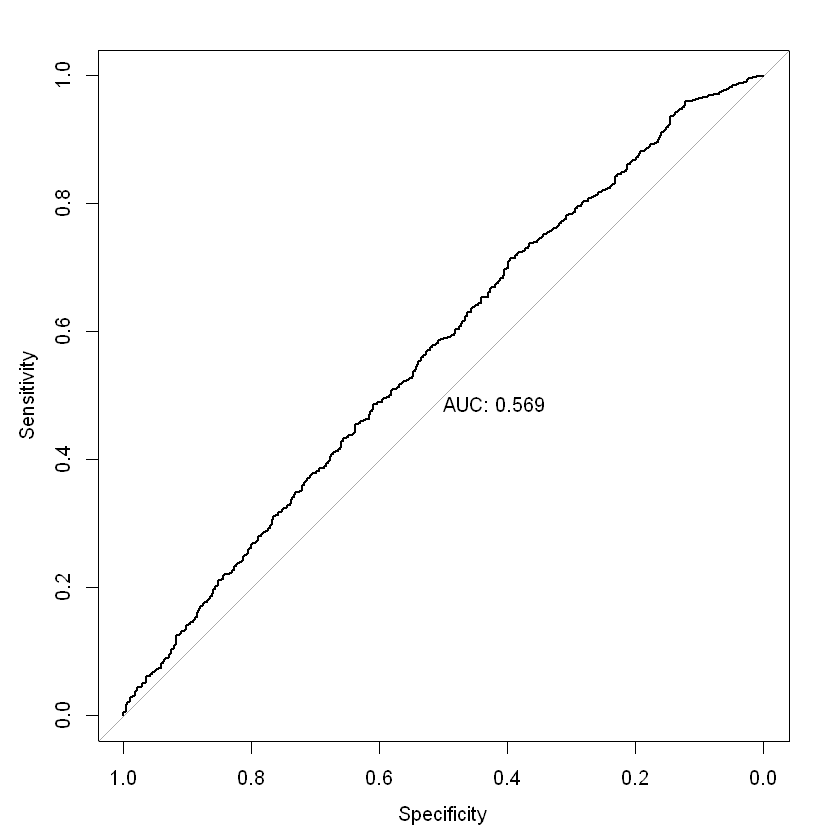

In [32]:
test_mod_back_vif_interaction <- predict(mod_back_vif_interaction, db_testing, type="response")
auc_mod_back_vif_interaction = roc(db_testing$y ~ test_mod_back_vif_interaction, plot = TRUE, print.auc = TRUE)

## Binomial Generalized Linear Mixed Models

Setting levels: control = 0, case = 1
Setting direction: controls < cases


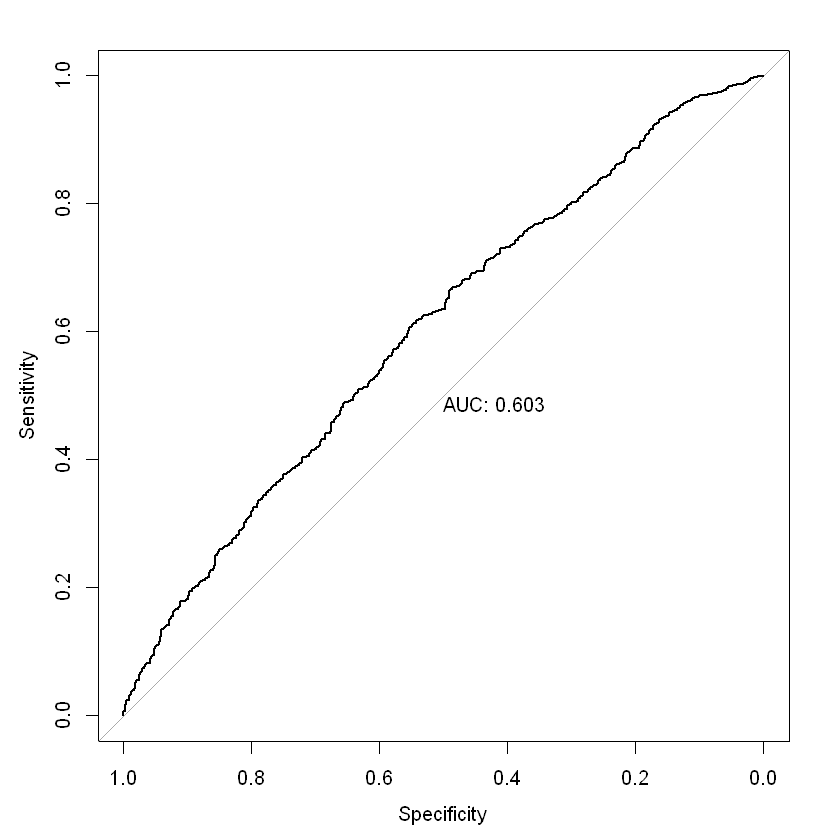

In [33]:
test_mx_mod_full <- predict(mx_mod_full, db_testing_t, type="response")
auc_mx_mod_full = roc(db_testing_t$y ~ test_mx_mod_full, plot = TRUE, print.auc = TRUE)

Setting levels: control = 0, case = 1
Setting direction: controls < cases


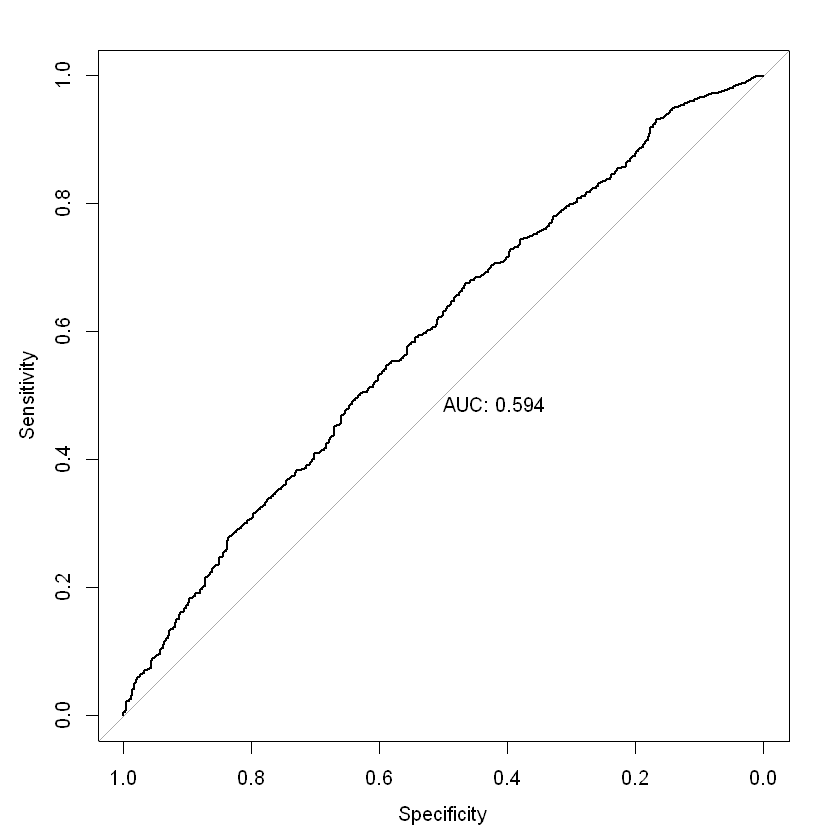

In [34]:
test_mx_mod_back <- predict(mx_mod_back, db_testing_t, type="response")
auc_mx_mod_back = roc(db_testing_t$y ~ test_mx_mod_back, plot = TRUE, print.auc = TRUE)

Setting levels: control = 0, case = 1
Setting direction: controls < cases


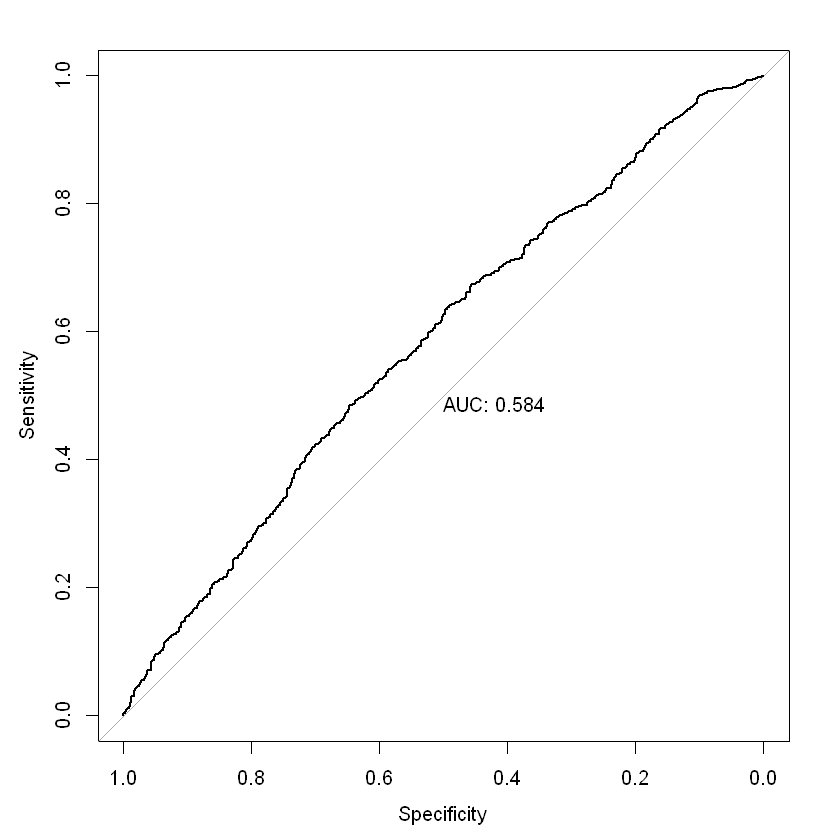

In [35]:
test_mx_mod_back_vif <- predict(mx_mod_back_vif, db_testing_t, type="response")
auc_mx_mod_back_vif = roc(db_testing_t$y ~ test_mx_mod_back_vif, plot = TRUE, print.auc = TRUE)

Setting levels: control = 0, case = 1
Setting direction: controls < cases


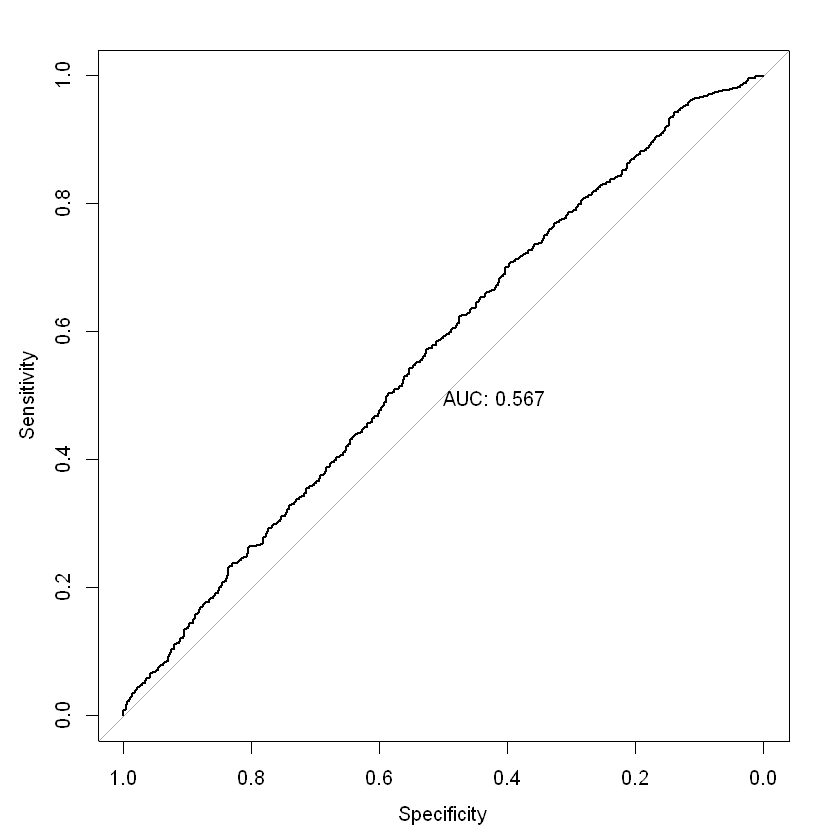

In [36]:
test_mx_mod_back_vif_interaction <- predict(mx_mod_back_vif_interaction, db_testing_t, type="response")
auc_mx_mod_back_vif_interaction = roc(db_testing_t$y ~ test_mx_mod_back_vif_interaction, plot = TRUE, print.auc = TRUE)